# Week 1 - Project: Data Analysis for Business Insights
## By: Omar Moustafa

# Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1. Load & Clean the Data

In [2]:
support_tickets = pd.read_csv("support_tickets.csv")

In [3]:
support_tickets.head(5)

,ticket_id,customer_id,ticket_date,issue_type,resolved
0,TKT0000-1,CUST00203,2024-08-17,Billing,Yes
1,TKT0000-2,CUST00203,2024-07-22,Technical Error,Yes
2,TKT0000-3,CUST00203,2024-07-22,Other,Yes
3,TKT0001-1,CUST00266,2024-09-26,Account Setup,Yes
4,TKT0001-2,CUST00266,2024-10-09,Technical Error,No


In [4]:
# Identify missing values, data types, and column structure for support_tickets
support_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ticket_id    123 non-null    object
 1   customer_id  123 non-null    object
 2   ticket_date  123 non-null    object
 3   issue_type   123 non-null    object
 4   resolved     123 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [5]:
support_tickets.isnull().sum()

ticket_id      0
customer_id    0
ticket_date    0
issue_type     0
resolved       0
dtype: int64

In [6]:
customer_signups = pd.read_csv("customer_signups.csv")

In [7]:
customer_signups.head(5)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02-01-24,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03-01-24,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04-01-24,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05-01-24,LinkedIn,West,Premium,No,25,Other


In [8]:
# Identify missing values, data types, and column structure for cusomter_signups
customer_signups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


In [9]:
customer_signups.isnull().sum()

customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [35]:
# Convert signup_date to datetime
customer_signups['signup_date'] = pd.to_datetime(customer_signups['signup_date'], errors = 'coerce')

In [11]:
# standardization plan_selected
customer_signups['plan_selected'] = customer_signups['plan_selected'].str.strip().str.capitalize()

# Check unique plan_selected values after standardization
print("\nUnique values in 'plan_selected' after standardisation:")
print(customer_signups['plan_selected'].unique())

print()

# standardization gender
customer_signups['gender'] = customer_signups['gender'].str.strip().str.capitalize()


Unique values in 'plan_selected' after standardisation:
['Basic' 'Premium' 'Pro' 'Unknownplan' nan 'Prem']



In [12]:
# Check unique gender values after standardization
print("\nUnique values in 'gender' after standardisation:")
print(customer_signups['gender'].unique())


Unique values in 'gender' after standardisation:
['Female' 'Male' 'Non-binary' 'Other' nan '123']


In [13]:
# Remove duplicate rows based on customer_id so that there is only 1 row per customer
before_duplicates = customer_signups.shape[0]
customer_signups.drop_duplicates(subset='customer_id', inplace=True)
after_duplicates = customer_signups.shape[0]
duplicates_removed = before_duplicates - after_duplicates
print(f"\nRemoved {duplicates_removed} duplicate rows based on customer_id.")


Removed 1 duplicate rows based on customer_id.


In [14]:
# Convert 'age' to numeric, coercing errors to NaN
customer_signups['age'] = pd.to_numeric(customer_signups['age'], errors='coerce')

# Calculate median after conversion
median_age = customer_signups['age'].median()

# Fill missing age values with median safely (no inplace warning)
customer_signups['age'] = customer_signups['age'].fillna(median_age)

# Confirm conversion and missingness handled
print(customer_signups['age'].describe())
print()
print(customer_signups['age'].isnull().sum())

count    299.000000
mean      36.036789
std       14.521749
min       21.000000
25%       25.000000
50%       34.000000
75%       40.000000
max      206.000000
Name: age, dtype: float64

0


In [15]:
# Final data check
print("\nCustomer Signups - Missing Values After Cleaning:")
print(customer_signups.isnull().sum())

print("\nCustomer Signups - Information After Cleaning:")
print(customer_signups.info())

print("\nTask 1: Data Loading & Cleaning Are Now Complete!")


Customer Signups - Missing Values After Cleaning:
customer_id          1
name                 9
email               34
signup_date          6
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                  0
gender               8
dtype: int64

Customer Signups - Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       298 non-null    object        
 1   name              290 non-null    object        
 2   email             265 non-null    object        
 3   signup_date       293 non-null    datetime64[ns]
 4   source            290 non-null    object        
 5   region            269 non-null    object        
 6   plan_selected     291 non-null    object        
 7   marketing_opt_in  289 non-null    object        
 8   age          

# Task 2. Data Quality Summary

In [16]:
# Count of missing values per column
missing_counts = customer_signups.isnull().sum()

# Missing percantages
missing_percent = (missing_counts / len(customer_signups)) * 100

In [17]:
# Number of duplicates removed
before_duplicates = customer_signups.duplicated(subset='customer_id').sum() + len(customer_signups)
after_duplicates = len(customer_signups)
duplicates_removed = before_duplicates - after_duplicates

In [18]:
unique_plans = customer_signups['plan_selected'].unique()

unique_genders = customer_signups['gender'].unique()

In [19]:
print("----- Data Quality Summary -----")
print("\n1. Missing Values Count per Column:")
print(missing_counts)
print()

print("\n2. Percentage of Missing Values per Column:")
print(missing_percent)
print()

print(f"\n3. Number of Duplicates Removed: {duplicates_removed}")

print("\n4. Unique values in 'plan_selected' after standardisation:")
print(unique_plans)
print()

print("\n5. Unique values in 'gender' after standardisation:")
print(unique_genders)

----- Data Quality Summary -----

1. Missing Values Count per Column:
customer_id          1
name                 9
email               34
signup_date          6
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                  0
gender               8
dtype: int64


2. Percentage of Missing Values per Column:
customer_id          0.334448
name                 3.010033
email               11.371237
signup_date          2.006689
source               3.010033
region              10.033445
plan_selected        2.675585
marketing_opt_in     3.344482
age                  0.000000
gender               2.675585
dtype: float64


3. Number of Duplicates Removed: 0

4. Unique values in 'plan_selected' after standardisation:
['Basic' 'Premium' 'Pro' 'Unknownplan' nan]


5. Unique values in 'gender' after standardisation:
['Female' 'Male' 'Non-binary' 'Other' nan '123']


# Task 3. Summary Outputs (Using Pandas Aggregations)

In [20]:
# Sign-ups per week (grouped by signup_date)
customer_signups['signup_week'] = customer_signups['signup_date'].dt.to_period('W').astype(str)

signups_per_week = customer_signups.groupby('signup_week')['customer_id'].count().reset_index()
signups_per_week.rename(columns={'customer_id': 'signups_count'}, inplace=True)

print("----- Sign-ups Per Week -----")
print(signups_per_week)

----- Sign-ups Per Week -----
              signup_week  signups_count
0   2024-01-01/2024-01-07              6
1   2024-01-08/2024-01-14              5
2   2024-01-15/2024-01-21              7
3   2024-01-22/2024-01-28              7
4   2024-01-29/2024-02-04              8
5   2024-02-05/2024-02-11              6
6   2024-02-12/2024-02-18              6
7   2024-02-19/2024-02-25              7
8   2024-02-26/2024-03-03              7
9   2024-03-04/2024-03-10              7
10  2024-03-11/2024-03-17              5
11  2024-03-18/2024-03-24              6
12  2024-03-25/2024-03-31              6
13  2024-04-01/2024-04-07              7
14  2024-04-08/2024-04-14              5
15  2024-04-15/2024-04-21              7
16  2024-04-22/2024-04-28              7
17  2024-04-29/2024-05-05              6
18  2024-05-06/2024-05-12              4
19  2024-05-13/2024-05-19              7
20  2024-05-20/2024-05-26              7
21  2024-05-27/2024-06-02              7
22  2024-06-03/2024-06-09  

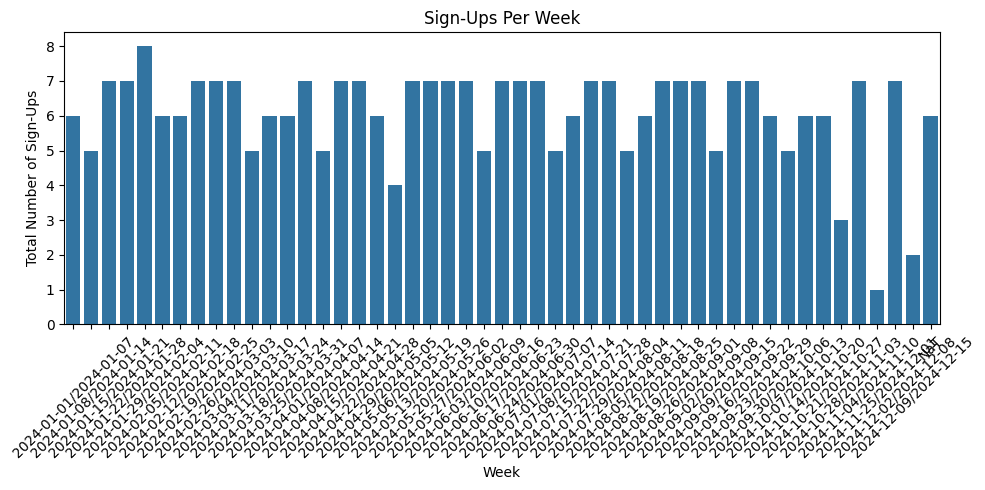

In [21]:
plt.figure(figsize = (10,5))
sns.barplot(data = signups_per_week, x = 'signup_week', y = 'signups_count')
plt.xticks(rotation = 45)
plt.title('Sign-Ups Per Week')
plt.ylabel('Total Number of Sign-Ups')
plt.xlabel('Week')
plt.tight_layout()
plt.show()

In [22]:
# Sign-ups by source
signups_by_source = customer_signups['source'].value_counts().reset_index()
signups_by_source.columns = ['source', 'signups_count']

print("\n----- Sign-ups By Source -----")
print(signups_by_source)


----- Sign-ups By Source -----
      source  signups_count
0    YouTube             58
1     Google             50
2   Referral             49
3  Instagram             48
4   Facebook             40
5   LinkedIn             39
6         ??              6


In [23]:
# Sign-ups by region
signups_by_region = customer_signups['region'].value_counts().reset_index()
signups_by_region.columns = ['region', 'signups_count']

print("\n----- Sign-ups By Region -----")
print(signups_by_region)


----- Sign-ups By Region -----
    region  signups_count
0    North             65
1     East             61
2    South             59
3     West             45
4  Central             39


In [24]:
# Sign-ups by plan_selected
signups_by_plan = customer_signups['plan_selected'].value_counts().reset_index()
signups_by_plan.columns = ['plan_selected', 'signups_count']

print("\n----- Sign-ups By Plan Selected -----")
print(signups_by_plan)


----- Sign-ups By Plan Selected -----
  plan_selected  signups_count
0       Premium             99
1           Pro             94
2         Basic             92
3   Unknownplan              6


In [25]:
# Marketing opt-in counts by gender
marketing_optin_by_gender = customer_signups.groupby(['gender', 'marketing_opt_in'])['customer_id'].count().reset_index()
marketing_optin_by_gender.rename(columns={'customer_id': 'count'}, inplace=True)

print("\n----- Marketing Opt-In Counts by Gender -----")
print(marketing_optin_by_gender)


----- Marketing Opt-In Counts by Gender -----
        gender marketing_opt_in  count
0          123               No      3
1          123              Yes      3
2       Female               No     47
3       Female              Yes     44
4         Male              Nil      1
5         Male               No     50
6         Male              Yes     37
7   Non-binary               No     20
8   Non-binary              Yes     19
9        Other               No     32
10       Other              Yes     24


In [26]:
# Fix invalid gender entries
valid_genders = ['Male', 'Female', 'Other', 'Non-binary']
customer_signups['gender'] = customer_signups['gender'].apply(lambda x: x if x in valid_genders else 'Unknown')

# Standardise marketing_opt_in values
customer_signups['marketing_opt_in'] = customer_signups['marketing_opt_in'].str.strip().str.capitalize()
customer_signups['marketing_opt_in'] = customer_signups['marketing_opt_in'].replace({'Nil': 'No'})

marketing_optin_by_gender = customer_signups.groupby(['gender', 'marketing_opt_in'])['customer_id'].count().reset_index()
marketing_optin_by_gender.rename(columns={'customer_id': 'count'}, inplace=True)

print("\n----- Final Marketing Opt-In Counts by Gender -----")
print(marketing_optin_by_gender)


----- Final Marketing Opt-In Counts by Gender -----
       gender marketing_opt_in  count
0      Female               No     47
1      Female              Yes     44
2        Male               No     51
3        Male              Yes     37
4  Non-binary               No     20
5  Non-binary              Yes     19
6       Other               No     32
7       Other              Yes     24
8     Unknown               No      7
9     Unknown              Yes      7


In [27]:
age_summary = {
    'min': customer_signups['age'].min(),
    'max': customer_signups['age'].max(),
    'mean': customer_signups['age'].mean(),
    'median': customer_signups['age'].median(),
    'null_count': customer_signups['age'].isnull().sum()
}

print("\n----- Age Summary -----")
print(age_summary)


----- Age Summary -----
{'min': 21.0, 'max': 206.0, 'mean': np.float64(36.03678929765886), 'median': 34.0, 'null_count': np.int64(0)}


In [28]:
# Check rows with age > 100
print(customer_signups[customer_signups['age'] > 100])

    customer_id             name                  email signup_date    source  \
204   CUST00204  Patricia Powers  patricia4@mailhub.org  2024-07-23  Referral   

    region plan_selected marketing_opt_in    age   gender  \
204  North         Basic               No  206.0  Unknown   

               signup_week  
204  2024-07-22/2024-07-28  


In [29]:
customer_signups = customer_signups[customer_signups['customer_id'] != 'CUST00204']

In [30]:
age_summary = {
    'min': customer_signups['age'].min(),
    'max': customer_signups['age'].max(),
    'mean': customer_signups['age'].mean(),
    'median': customer_signups['age'].median(),
    'null_count': customer_signups['age'].isnull().sum()
}

print("\n----- Final Age Summary -----")
print(age_summary)


----- Final Age Summary -----
{'min': 21.0, 'max': 60.0, 'mean': np.float64(35.466442953020135), 'median': 34.0, 'null_count': np.int64(0)}


# Task 4. Answer These Business Questions

## Task 4.1 – Which acquisition source brought in the most users last month?

In [31]:
# Extract last month's date range
latest_date = customer_signups['signup_date'].max()
last_month = latest_date - pd.DateOffset(months=1)

# Filter signups from last month
last_month_signups = customer_signups[customer_signups['signup_date'] >= last_month]

# Count by source
most_users_source = last_month_signups['source'].value_counts().reset_index()
most_users_source.columns = ['source', 'signups_count']

print("----- Last Month's Acquisition Source -----")
print(most_users_source)

----- Last Month's Acquisition Source -----
      source  signups_count
0  Instagram              4
1   Referral              2
2    YouTube              2
3   Facebook              1
4   LinkedIn              1


## Task 4.2 – Which region shows signs of missing or incomplete data?

In [32]:
# Check counts of 'Unknown' regions (assuming you replaced missing with 'Unknown')
region_missing = customer_signups['region'].value_counts().reset_index()
region_missing.columns = ['region', 'count']

print("----- Region vs Missing Data -----")
print(region_missing)

----- Region vs Missing Data -----
    region  count
0    North     64
1     East     61
2    South     59
3     West     45
4  Central     39


## Task 4.3 – Are older users more or less likely to opt in to marketing?

In [33]:
marketing_age = customer_signups.groupby('marketing_opt_in')['age'].mean().reset_index()
marketing_age.columns = ['marketing_opt_in', 'average_age']

print("----- Average Age by Marketing Opt-In -----")
print(marketing_age)

----- Average Age by Marketing Opt-In -----
  marketing_opt_in  average_age
0               No    35.179487
1              Yes    35.939394


## Task 4.4 – Which plan is most commonly selected, and by which age group?

In [38]:
# Most commonly selected plan
plan_counts = customer_signups['plan_selected'].value_counts().reset_index()
plan_counts.columns = ['plan_selected', 'count']

print("----- Most Common Plan -----")
print(plan_counts)

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '21-30', '31-40', '41-50', '51-60', '60+']
customer_signups['age_group'] = pd.cut(customer_signups['age'], bins=bins, labels=labels, right=False)

# Most common plan by age group
plan_by_agegroup = customer_signups.groupby(['age_group', 'plan_selected'], observed=False)['customer_id'].count().reset_index()
plan_by_agegroup.columns = ['age_group', 'plan_selected', 'count']

print("----- Plan Selection by Age Group -----")
print(plan_by_agegroup)

----- Most Common Plan -----
  plan_selected  count
0       Premium     99
1           Pro     94
2         Basic     91
3   Unknownplan      6
----- Plan Selection by Age Group -----
   age_group plan_selected  count
0        <20         Basic      0
1        <20       Premium      0
2        <20           Pro      0
3        <20   Unknownplan      0
4      21-30         Basic     40
5      21-30       Premium     37
6      21-30           Pro     40
7      21-30   Unknownplan      1
8      31-40         Basic     21
9      31-40       Premium     20
10     31-40           Pro     19
11     31-40   Unknownplan      1
12     41-50         Basic     16
13     41-50       Premium     32
14     41-50           Pro     19
15     41-50   Unknownplan      3
16     51-60         Basic      9
17     51-60       Premium      6
18     51-60           Pro     11
19     51-60   Unknownplan      1
20       60+         Basic      5
21       60+       Premium      4
22       60+           Pro      4
